In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ahith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ahith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ahith\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Loading Reviews Data and Performing Basic Exploratory Analysis

In [2]:
review_data = pd.read_csv("trustpilot_reviews.csv")
review_data

,Company,Rating,Review,Date
0,Currys,3.5,I had been looking for a new laptop for a whil...,14 July 2023
1,Currys,5.0,The Curry’s at Gallagher retail outlet were fa...,11 July 2023
2,Currys,5.0,Absolutely delighted with my recent purchase e...,14 July 2023
3,Currys,5.0,The airfrier was well packed and is an amazing...,11 July 2023
4,Currys,5.0,The delivery men were superb! They realised th...,09 July 2023
...,...,...,...,...
561135,WesternUnion,1.0,Have sent funds with WU for years with no prob...,"October 20, 2014"
561136,WesternUnion,1.0,I have been registered on their site for 3 yea...,"October 20, 2014"
561137,WesternUnion,1.0,I had used western union about 5 times in last...,"October 16, 2014"
561138,WesternUnion,4.0,Sent over $100 to a friend. Waited a few month...,"September 21, 2014"


In [3]:
review_data.head()

,Company,Rating,Review,Date
0,Currys,3.5,I had been looking for a new laptop for a whil...,14 July 2023
1,Currys,5.0,The Curry’s at Gallagher retail outlet were fa...,11 July 2023
2,Currys,5.0,Absolutely delighted with my recent purchase e...,14 July 2023
3,Currys,5.0,The airfrier was well packed and is an amazing...,11 July 2023
4,Currys,5.0,The delivery men were superb! They realised th...,09 July 2023


In [4]:
review_data.tail()

,Company,Rating,Review,Date
561135,WesternUnion,1.0,Have sent funds with WU for years with no prob...,"October 20, 2014"
561136,WesternUnion,1.0,I have been registered on their site for 3 yea...,"October 20, 2014"
561137,WesternUnion,1.0,I had used western union about 5 times in last...,"October 16, 2014"
561138,WesternUnion,4.0,Sent over $100 to a friend. Waited a few month...,"September 21, 2014"
561139,WesternUnion,1.0,I made a transfer to my father for his birthda...,"January 13, 2014"


In [5]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561140 entries, 0 to 561139
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Company  561140 non-null  object 
 1   Rating   561140 non-null  float64
 2   Review   483568 non-null  object 
 3   Date     561140 non-null  object 
dtypes: float64(1), object(3)
memory usage: 17.1+ MB


In [6]:
review_data.shape

(561140, 4)

In [7]:
duplicate_rows = review_data.duplicated()
duplicate_rows

0         False
1         False
2         False
3         False
4         False
          ...  
561135    False
561136    False
561137    False
561138    False
561139    False
Length: 561140, dtype: bool

In [8]:
review_data.isnull().sum()

Company        0
Rating         0
Review     77572
Date           0
dtype: int64

In [9]:
review_data = review_data.dropna()

In [10]:
review_data.shape

(483568, 4)

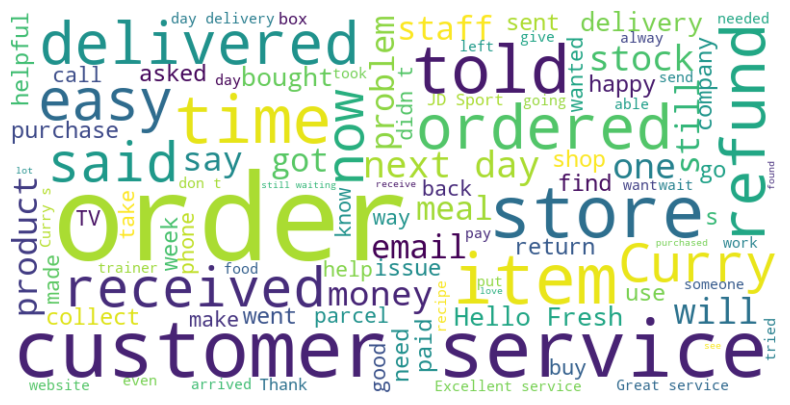

In [11]:
# Create a word cloud from the "Reviews" column in the DataFrame
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(review_data['Review']))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Pre-Processing of Text Data

In [12]:
lemmatizer = WordNetLemmatizer()
stop_words = nltk.corpus.stopwords.words('english')
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

def preprocess_text(text):
    tokens = tokenizer.tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

review_data['Processed_review'] = review_data['Review'].apply(preprocess_text)
review_data

C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\478028480.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_data['Processed_review'] = review_data['Review'].apply(preprocess_text)


,Company,Rating,Review,Date,Processed_review
0,Currys,3.5,I had been looking for a new laptop for a whil...,14 July 2023,looking new laptop visited swindon branch coup...
1,Currys,5.0,The Curry’s at Gallagher retail outlet were fa...,11 July 2023,curry gallagher retail outlet far efficient ac...
2,Currys,5.0,Absolutely delighted with my recent purchase e...,14 July 2023,absolutely delighted recent purchase experienc...
3,Currys,5.0,The airfrier was well packed and is an amazing...,11 July 2023,airfrier well packed amazing oven arriving ear...
4,Currys,5.0,The delivery men were superb! They realised th...,09 July 2023,delivery men superb realised mum dad quite eld...
...,...,...,...,...,...
561135,WesternUnion,1.0,Have sent funds with WU for years with no prob...,"October 20, 2014",sent fund wu year problem changed mc debit car...
561136,WesternUnion,1.0,I have been registered on their site for 3 yea...,"October 20, 2014",registered site 3 year wu never verified dispi...
561137,WesternUnion,1.0,I had used western union about 5 times in last...,"October 16, 2014",used western union 5 time last 2 month offer p...
561138,WesternUnion,4.0,Sent over $100 to a friend. Waited a few month...,"September 21, 2014",sent 100 friend waited month emailed support c...


## Sentiment Analysis with Vader

In [13]:
#Only take the compound score because that's what we are interested in
sia = SentimentIntensityAnalyzer()
review_data['Vader_score'] = review_data['Processed_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
review_data

C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\4003384847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_data['Vader_score'] = review_data['Processed_review'].apply(lambda x: sia.polarity_scores(x)['compound'])


,Company,Rating,Review,Date,Processed_review,Vader_score
0,Currys,3.5,I had been looking for a new laptop for a whil...,14 July 2023,looking new laptop visited swindon branch coup...,0.8299
1,Currys,5.0,The Curry’s at Gallagher retail outlet were fa...,11 July 2023,curry gallagher retail outlet far efficient ac...,0.8720
2,Currys,5.0,Absolutely delighted with my recent purchase e...,14 July 2023,absolutely delighted recent purchase experienc...,0.9412
3,Currys,5.0,The airfrier was well packed and is an amazing...,11 July 2023,airfrier well packed amazing oven arriving ear...,0.9762
4,Currys,5.0,The delivery men were superb! They realised th...,09 July 2023,delivery men superb realised mum dad quite eld...,0.9738
...,...,...,...,...,...,...
561135,WesternUnion,1.0,Have sent funds with WU for years with no prob...,"October 20, 2014",sent fund wu year problem changed mc debit car...,-0.5535
561136,WesternUnion,1.0,I have been registered on their site for 3 yea...,"October 20, 2014",registered site 3 year wu never verified dispi...,-0.1027
561137,WesternUnion,1.0,I had used western union about 5 times in last...,"October 16, 2014",used western union 5 time last 2 month offer p...,0.7783
561138,WesternUnion,4.0,Sent over $100 to a friend. Waited a few month...,"September 21, 2014",sent 100 friend waited month emailed support c...,0.7096


## ANALYSING SENTIMENT SCORE

In [14]:
#Define a score threshold to classify reviews based on sentiment score
threshold = 0
review_data['Vader_analysis'] = ['Positive' if score > threshold else 'Negative' if score 
                  < threshold  else 'Neutral' for score in review_data['Vader_score']]
review_data

C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\3715924548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_data['Vader_analysis'] = ['Positive' if score > threshold else 'Negative' if score


,Company,Rating,Review,Date,Processed_review,Vader_score,Vader_analysis
0,Currys,3.5,I had been looking for a new laptop for a whil...,14 July 2023,looking new laptop visited swindon branch coup...,0.8299,Positive
1,Currys,5.0,The Curry’s at Gallagher retail outlet were fa...,11 July 2023,curry gallagher retail outlet far efficient ac...,0.8720,Positive
2,Currys,5.0,Absolutely delighted with my recent purchase e...,14 July 2023,absolutely delighted recent purchase experienc...,0.9412,Positive
3,Currys,5.0,The airfrier was well packed and is an amazing...,11 July 2023,airfrier well packed amazing oven arriving ear...,0.9762,Positive
4,Currys,5.0,The delivery men were superb! They realised th...,09 July 2023,delivery men superb realised mum dad quite eld...,0.9738,Positive
...,...,...,...,...,...,...,...
561135,WesternUnion,1.0,Have sent funds with WU for years with no prob...,"October 20, 2014",sent fund wu year problem changed mc debit car...,-0.5535,Negative
561136,WesternUnion,1.0,I have been registered on their site for 3 yea...,"October 20, 2014",registered site 3 year wu never verified dispi...,-0.1027,Negative
561137,WesternUnion,1.0,I had used western union about 5 times in last...,"October 16, 2014",used western union 5 time last 2 month offer p...,0.7783,Positive
561138,WesternUnion,4.0,Sent over $100 to a friend. Waited a few month...,"September 21, 2014",sent 100 friend waited month emailed support c...,0.7096,Positive


# COUNTING AND VISUALISING SENTIMENTS FOR COMPANIES

In [15]:
review_data['Vader_analysis'].value_counts()

Positive    338174
Negative    103151
Neutral      42243
Name: Vader_analysis, dtype: int64

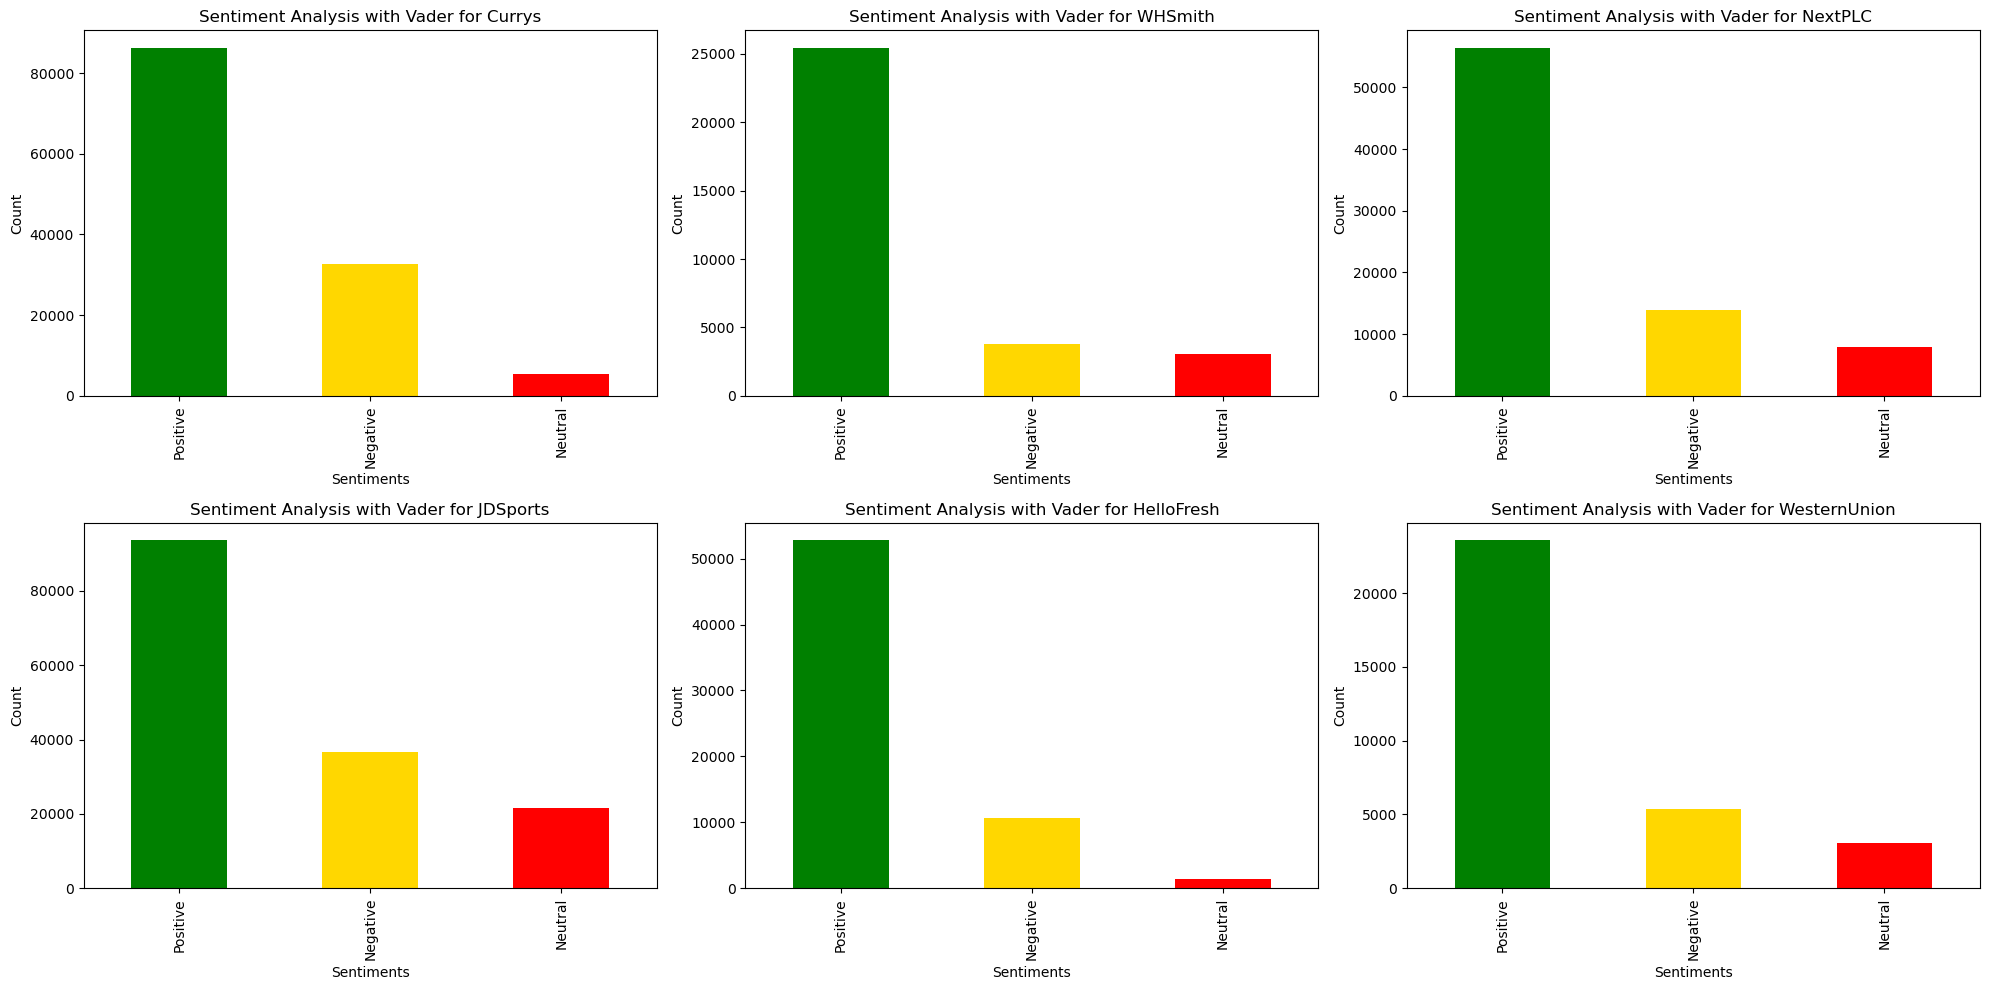

In [16]:
companies = review_data['Company'].unique()

fig, axs = plt.subplots(2, 3, figsize=(20, 10))  # Create a grid of 2 rows and 3 columns for the subplots

for i, company in enumerate(companies):
    ax = axs[i // 3, i % 3]  # Determine the row and column for each subplot
    company_reviews = review_data[review_data['Company'] == company]
    company_reviews['Vader_analysis'].value_counts().plot(kind='bar', color=['green','gold','red'], ax=ax)
    ax.set_title(f'Sentiment Analysis with Vader for {company}')
    ax.set_xlabel('Sentiments')
    ax.set_ylabel('Count')

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

## Loading Semi-Annual Financial Data

In [17]:
# List of semi-annual companies
semi_annual_companies = ['Currys', 'WHSmith', 'NextPLC', 'JDSports']  # replace with your actual company names

final_data = pd.DataFrame()

for company in semi_annual_companies:
    # Get the sentiment data for the company
    company_sentiment_data = review_data[review_data['Company'] == company].copy()
    company_sentiment_data['Date'] = pd.to_datetime(company_sentiment_data['Date'])
    company_sentiment_data.set_index('Date', inplace=True)
    company_sentiment_data = company_sentiment_data.resample('2Q').agg({'Vader_score': 'mean', 'Review': 'count'})

    # Create a year and semi column in the sentiment data
    company_sentiment_data['Year'] = company_sentiment_data.index.year
    company_sentiment_data['Semi'] = (company_sentiment_data.index.quarter + 1) // 2

    # Load and process the financial data for the company
    company_financial_data = pd.read_excel(f'{company}_financial_data.xlsx')
    company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
    company_financial_data.set_index('Date', inplace=True)

    # Create a year and semi column in the financial data
    company_financial_data['Year'] = company_financial_data.index.year
    company_financial_data['Semi'] = (company_financial_data.index.quarter + 1) // 2

    # Merge the sentiment data with the financial data
    company_data = pd.merge(company_financial_data, company_sentiment_data, on=['Year', 'Semi'])
    company_data['Company'] = company

    # Append the data for the company to the final DataFrame
    final_data = final_data.append(company_data)

C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1322458929.py:19: UserWarning: Parsing '29-04-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1322458929.py:19: UserWarning: Parsing '29-10-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1322458929.py:19: UserWarning: Parsing '30-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1322458929.py:19: UserWarning: Parsing '30-10-2021' in DD/MM/YYYY format. Provide format or specify i

C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1322458929.py:19: UserWarning: Parsing '28-01-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1322458929.py:19: UserWarning: Parsing '30-07-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1322458929.py:19: UserWarning: Parsing '29-01-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1322458929.py:19: UserWarning: Parsing '31-07-2021' in DD/MM/YYYY format. Provide format or specify i

## Loading Quarterly Financial Data

In [18]:
# List of quarterly companies
quarterly_companies = ['HelloFresh', 'WesternUnion']  # replace with your actual company names

for company in quarterly_companies:
    # Get the sentiment data for the company
    company_sentiment_data = review_data[review_data['Company'] == company].copy()
    company_sentiment_data['Date'] = pd.to_datetime(company_sentiment_data['Date'])
    company_sentiment_data.set_index('Date', inplace=True)
    company_sentiment_data = company_sentiment_data.resample('2Q').agg({'Vader_score': 'mean', 'Review': 'count'})

    # Create a year and semi column in the sentiment data
    company_sentiment_data['Year'] = company_sentiment_data.index.year
    company_sentiment_data['Semi'] = (company_sentiment_data.index.quarter + 1) // 2

    # Load and process the financial data for the company
    company_financial_data = pd.read_excel(f'{company}_financial_data.xlsx')
    company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
    company_financial_data.set_index('Date', inplace=True)

    # Create a year and quarter column in the financial data
    company_financial_data['Year'] = company_financial_data.index.year
    company_financial_data['Quarter'] = company_financial_data.index.quarter

    # Merge the sentiment data with the financial data
    company_data = pd.merge(company_financial_data, company_sentiment_data, left_on=['Year', 'Quarter'], right_on=['Year', 'Semi'])
    company_data['Company'] = company

    # Append the data for the company to the final DataFrame
    final_data = final_data.append(company_data)


C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1922084669.py:17: UserWarning: Parsing '31-03-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1922084669.py:17: UserWarning: Parsing '31-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1922084669.py:17: UserWarning: Parsing '30-09-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1922084669.py:17: UserWarning: Parsing '30-06-2022' in DD/MM/YYYY format. Provide format or specify i

C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1922084669.py:17: UserWarning: Parsing '30-06-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1922084669.py:17: UserWarning: Parsing '31-03-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1922084669.py:17: UserWarning: Parsing '31-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  company_financial_data['Date'] = pd.to_datetime(company_financial_data['Date'])
C:\Users\ahith\AppData\Local\Temp\ipykernel_14904\1922084669.py:17: UserWarning: Parsing '30-09-2022' in DD/MM/YYYY format. Provide format or specify i

## Merged Panel Data

In [19]:
final_data

,Revenue,Gross_Profit,Net_Income,Year,Semi,Vader_score,Review,Company,Quarter
0,5038.0,5038.0,79.0,2023,1,0.336862,18465,Currys,NaN
1,4473.0,4473.0,-560.0,2022,2,0.437670,16688,Currys,NaN
2,5339.0,5339.0,29.0,2022,1,0.396808,22212,Currys,NaN
3,4783.0,4783.0,42.0,2021,2,0.414442,15667,Currys,NaN
4,5471.0,5471.0,-17.0,2021,1,0.294618,20457,Currys,NaN
...,...,...,...,...,...,...,...,...,...
15,1297.7,518.3,185.7,2016,1,0.091516,37,WesternUnion,1.0
16,1383.6,584.2,189.3,2015,2,0.493521,145,WesternUnion,2.0
17,1320.9,549.1,203.9,2015,1,0.029930,10,WesternUnion,1.0
18,1405.6,577.8,193.8,2014,2,0.709600,1,WesternUnion,2.0
